In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Loading the dataset and renaming the column ( Adj Close -> Adj_Close)
df = pd.read_csv("/content/Stock Market.csv", header=0)


df.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)

print(df.shape)
print(df.head())

(2011, 7)
         Date       Open       High        Low      Close  Adj_Close    Volume
0  03-01-2012  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
1  04-01-2012  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2  05-01-2012  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
3  06-01-2012  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
4  09-01-2012  60.785713  61.107143  60.192856  60.247143  52.061932  98506100


In [3]:
print(df.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj_Close    float64
Volume         int64
dtype: object


The below code converts the ‘Date’ column (or index) into proper datetime format, removes invalid dates, sorts the data by date, and sets the Date as the index so the dataset becomes clean and ready for any time-series analysis.

In [4]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
    df = df.sort_values('Date')              # sort by date
    df = df.dropna(subset=['Date'])          # drop rows where date failed to parse
    df.set_index('Date', inplace=True)       # make Date the index
else:
    # If 'Date' is not a column, it's likely already the index.
    # Ensure the index is a DatetimeIndex and sorted.
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index, dayfirst=True, errors='coerce')
    df.sort_index(inplace=True)
    # Remove rows where index (original Date) failed to parse
    df = df[~df.index.isna()]

In [5]:
print(df.tail())

                  Open        High         Low       Close   Adj_Close  \
Date                                                                     
2019-12-23  280.529999  284.250000  280.369995  284.000000  282.054138   
2019-12-24  284.690002  284.890015  282.920013  284.269989  282.322266   
2019-12-26  284.820007  289.980011  284.700012  289.910004  287.923645   
2019-12-27  291.119995  293.970001  288.119995  289.799988  287.814392   
2019-12-30  289.459991  292.690002  285.220001  291.519989  289.522614   

              Volume  
Date                  
2019-12-23  24643000  
2019-12-24  12119700  
2019-12-26  23280300  
2019-12-27  36566500  
2019-12-30  36028600  


In [6]:
#checking for null values
print(df.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64


In [7]:
#check for Duplicate values
print("Duplicate rows:", df.duplicated().sum())
print("Duplicate dates:", df.index.duplicated().sum())


Duplicate rows: 0
Duplicate dates: 0


In [8]:
# Basic  checks for OHLC data:
# Check if 'High' is ever lower than any of Open, Close, or Low (which is invalid).
invalid_high = (df['High'] < df[['Open','Close','Low']].max(axis=1)).sum()

# Check if 'Low' is ever higher than any of Open, Close, or High (also invalid).
invalid_low  = (df['Low'] > df[['Open','Close','High']].min(axis=1)).sum()

# Print how many rows violate OHLC rules.
print("Days with invalid High:", invalid_high)
print("Days with invalid Low:", invalid_low)


Days with invalid High: 0
Days with invalid Low: 0


High price should always be the maximum price of the day, so it cannot be below Open/Close/Low.

Low price should always be the minimum price of the day, so it cannot be above Open/Close/High.

In [9]:
#Descriptive stastics
df[['Open','High','Low','Close','Adj_Close','Volume']].describe()


,Open,High,Low,Close,Adj_Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


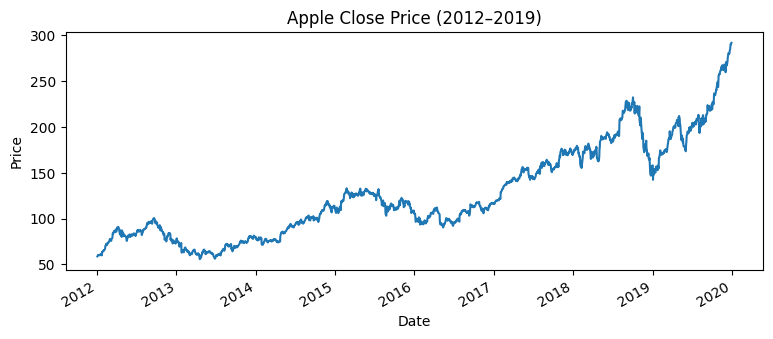

In [10]:
#Visualize Closing price over time
df['Close'].plot(figsize=(9,3.5))
plt.title("Apple Close Price (2012–2019)")
plt.ylabel("Price")
plt.show()


conclusion: The closing price of Apple shows a strong upward trend from 2012 to 2019. The price rises steadily over time with noticeable corrections in between, especially around the mid-period. This confirms that the data is non-stationary and has a long-term growth pattern.


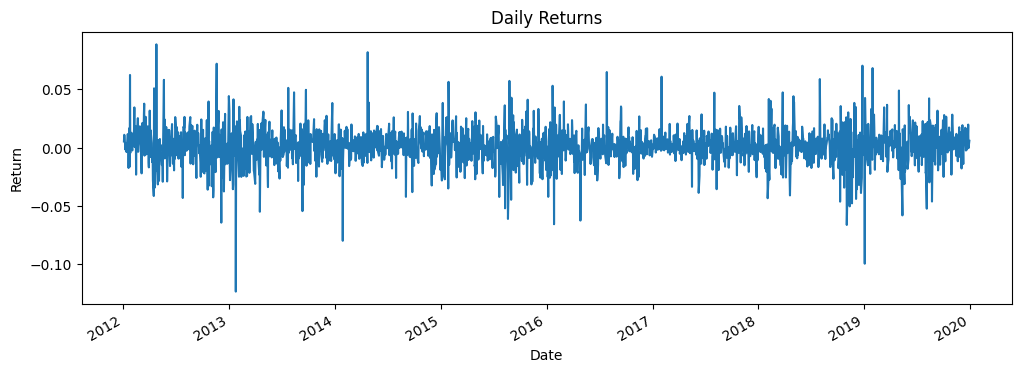

In [11]:
# Calculate daily returns: percentage change in the closing price from one day to the next.
df['Return'] = df['Close'].pct_change()

# Plot the daily returns to visualize how much the stock moves up or down each day.
df['Return'].plot(figsize=(12,4))
plt.title("Daily Returns")
plt.ylabel("Return")
plt.show()



#If a bar is above zero → price increased from yesterday
#If a bar is below zero → price decreased from yesterday
conclusion: Daily returns fluctuate around zero throughout the entire time period. There are frequent upward and downward spikes, indicating that the stock experiences regular volatility and reacts strongly to market events.


In [12]:
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))

df[['Close', 'Return', 'Log_Return']].head()

,Close,Return,Log_Return
Date,,,
2012-01-03,58.747143,NaN,NaN
2012-01-04,59.062859,0.005374,0.005360
2012-01-05,59.718571,0.011102,0.011041
2012-01-06,60.342857,0.010454,0.010400
2012-01-09,60.247143,-0.001586,-0.001587


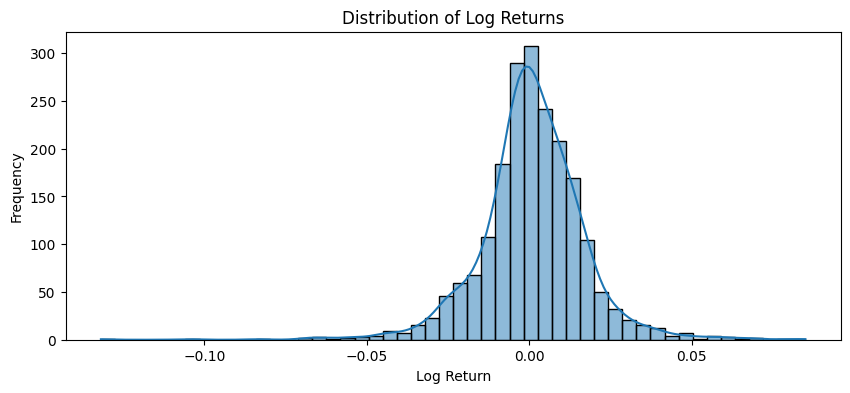

In [13]:
# Visualizing the distribution of Daily and Log Returns
# 'dropna()' removes the first NaN return, 'bins=50' gives finer detail,
# 'kde=True' adds a smooth curve showing the distribution shape.

plt.figure(figsize=(10, 4))
sns.histplot(df['Log_Return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Log Returns')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.show()

conclusion:
Most daily returns are concentrated close to zero, and only a small number of days show large positive or negative returns. The distribution has fat tails, meaning extreme price movements happen occasionally rather than being completely stable.


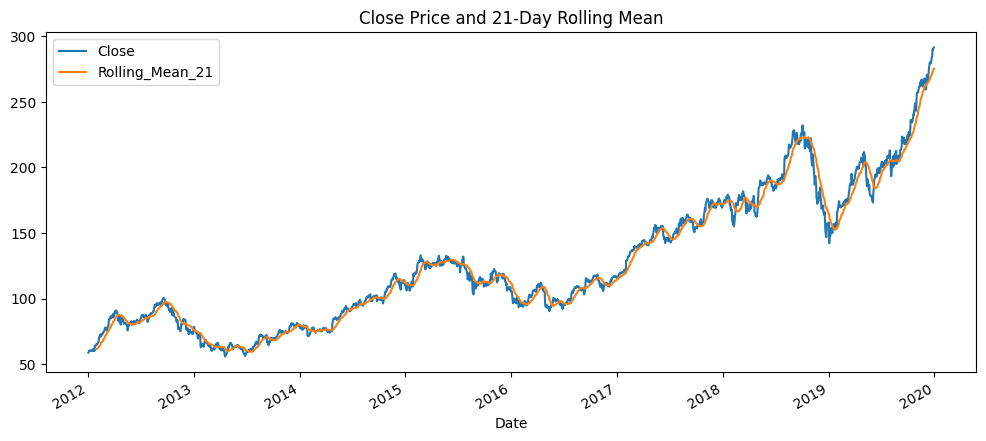

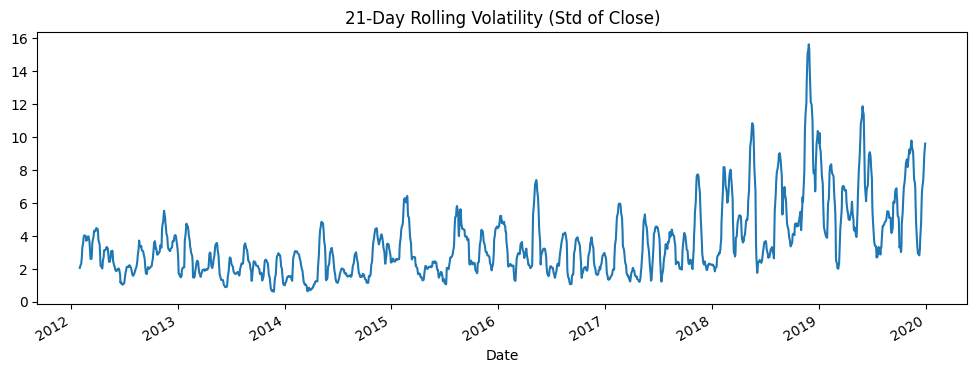

In [14]:
# Rolling mean & rolling volatility
# Rolling Mean: moving average that smooths short-term noise and shows the trend.
# Rolling Volatility: rolling standard deviation that shows how much the price fluctuates (risk).



# 'window = 21' means we look at the past 21 days (~1 month of trading).

window = 21

# Calculate 21-day rolling average of the closing price (smooths short-term noise).
df['Rolling_Mean_21'] = df['Close'].rolling(window).mean()


# Calculate 21-day rolling standard deviation (measures monthly volatility).
df['Rolling_Std_21']  = df['Close'].rolling(window).std()


# Plot closing price along with the rolling average to visualize trends.
df[['Close','Rolling_Mean_21']].plot(figsize=(12,5))
plt.title("Close Price and 21-Day Rolling Mean")
plt.show()


# Plot the rolling standard deviation to see how volatility changes over time.
df['Rolling_Std_21'].plot(figsize=(12,4))
plt.title("21-Day Rolling Volatility (Std of Close)")
plt.show()


The 21-day rolling mean closely follows the closing price and smooths out short-term noise, clearly showing the rising trend.
 The 21-day rolling volatility varies over time, with some periods much more volatile than others, meaning the stock goes through both calm and highly unstable phases.


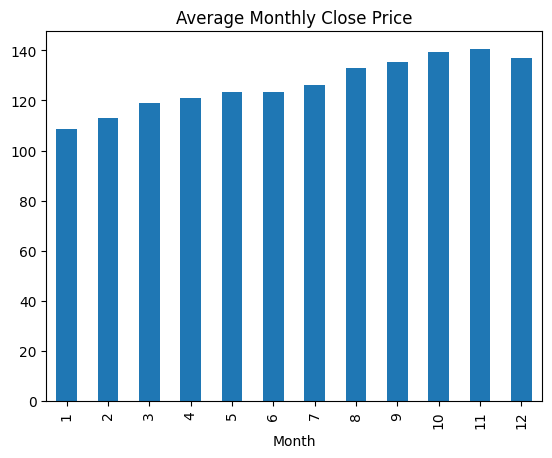

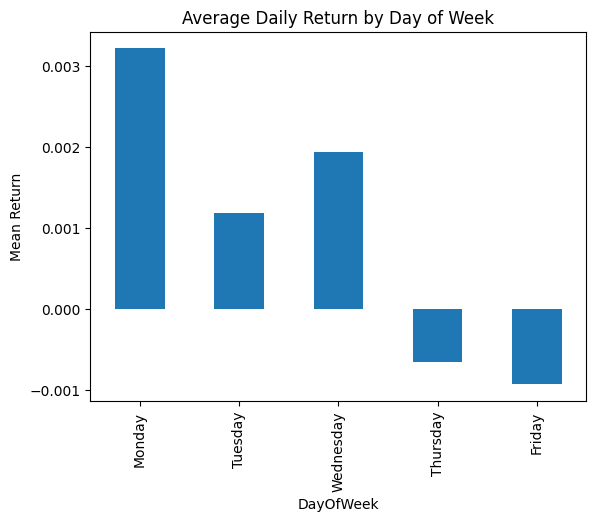

In [15]:
# Seasonality analysis: extract month and day-of-week from the Date index.
df['Month'] = df.index.month
df['DayOfWeek'] = df.index.day_name()

# Plot the average closing price for each month to check for monthly seasonality.
df.groupby('Month')['Close'].mean().plot(kind='bar')
plt.title("Average Monthly Close Price")
plt.show()

# Plot the average return for each weekday to check for weekly seasonality.
df.groupby('DayOfWeek')['Return'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday']
).plot(kind='bar')
plt.title("Average Daily Return by Day of Week")
plt.ylabel("Mean Return")
plt.show()


The average monthly closing price gradually increases from Month 1 to Month 12, showing that prices tend to rise later in the year. This suggests the presence of a mild seasonal pattern in Apple's stock performance.


The average return differs slightly across weekdays. Monday shows the highest positive average return, while Thursday has a small negative average return. This indicates a weak day-of-week effect in returns.


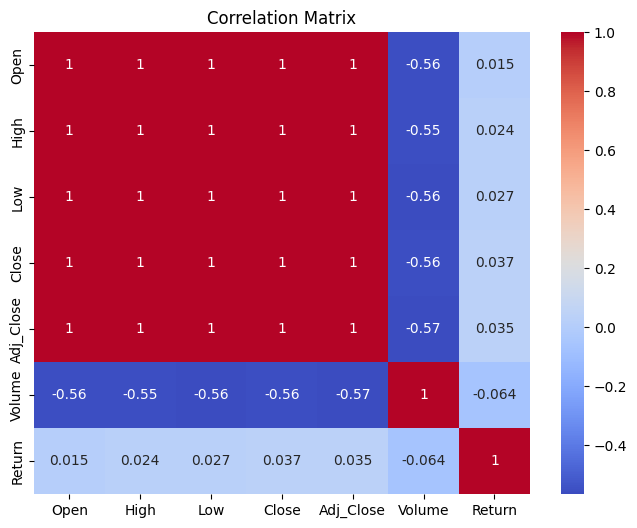

In [16]:
# Correlation matrix of OHLCV data:
# OHLCV = Open, High, Low, Close, Volume (standard stock market data fields)
# Adding 'Adj_Close' and 'Return' to see how all variables relate to each other.

corr = df[['Open','High','Low','Close','Adj_Close','Volume','Return']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



Open, High, Low, Close, and Adj_Close are almost perfectly correlated with each other, meaning all price values move together. Volume has a negative correlation with prices, while Return is only weakly correlated with the other variables. This shows that raw OHLC values contain similar information, and additional engineered features will be more useful for prediction.


## Volume Analysis

Trading volume represents the number of shares traded and is an important indicator of market activity and participant interest. In this section, we analyze how volume evolves over time, its relationship with price, and a rolling average of volume to smooth short-term fluctuations.

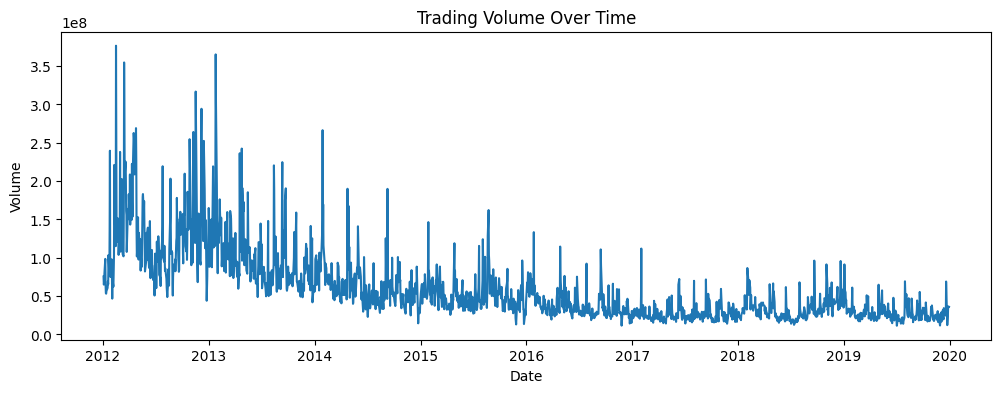

In [17]:
# Trading Volume over time

plt.figure(figsize=(12, 4))
plt.plot(df.index, df['Volume'])
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

conclusion:Trading volume was high in the early years and gradually declined over time, with occasional spikes showing sudden heavy trading.

##Outlier Detection

In [18]:
# Outlier detection on return columns using IQR method

return_cols = ['Return', 'Log_Return']
outlier_counts = {}

for col in return_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_counts[col] = len(outliers)

outlier_counts

{'Return': 102, 'Log_Return': 103}

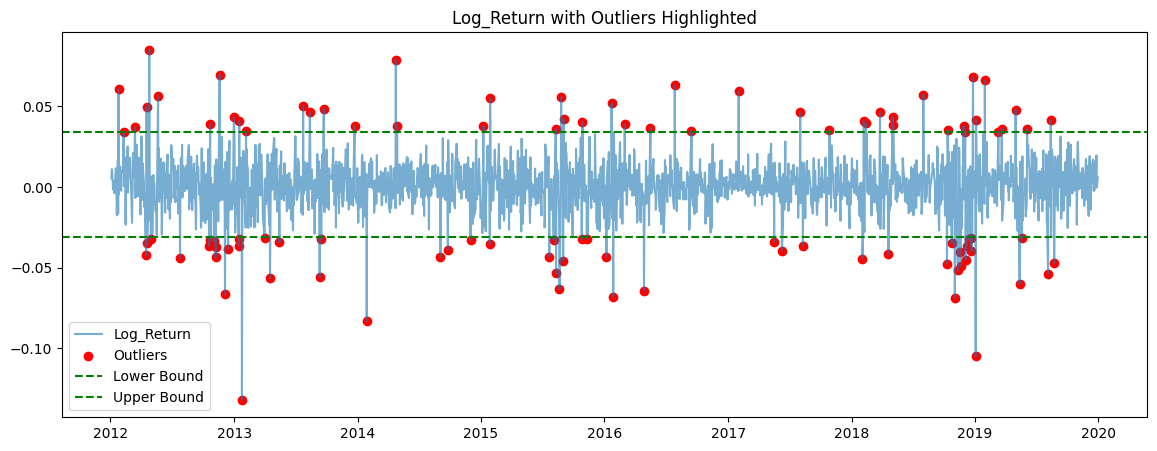

In [19]:
plt.figure(figsize=(14,5))
plt.plot(df.index, df[col], label=col, alpha=0.6)          # full time series
plt.scatter(outliers.index, outliers, color='red', label='Outliers')  # outliers
plt.axhline(lower_bound, color='green', linestyle='--', label='Lower Bound')
plt.axhline(upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.title(f"{col} with Outliers Highlighted")
plt.legend()
plt.show()


In [20]:
# Capping outliers in return columns to create a cleaned dataset df_cap

df_cap = df.copy()

for col in ['Return', 'Log_Return']:
    Q1 = df_cap[col].quantile(0.25)
    Q3 = df_cap[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cap[col] = df_cap[col].clip(lower_bound, upper_bound)

df_cap[['Return', 'Log_Return']].head()

,Return,Log_Return
Date,,
2012-01-03,NaN,NaN
2012-01-04,0.005374,0.005360
2012-01-05,0.011102,0.011041
2012-01-06,0.010454,0.010400
2012-01-09,-0.001586,-0.001587


In [21]:
df_cap.head()

,Open,High,Low,Close,Adj_Close,Volume,Return,Log_Return,Rolling_Mean_21,Rolling_Std_21,Month,DayOfWeek
Date,,,,,,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN,NaN,NaN,NaN,1,Tuesday
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,0.005374,0.005360,NaN,NaN,1,Wednesday
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,0.011102,0.011041,NaN,NaN,1,Thursday
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,0.010454,0.010400,NaN,NaN,1,Friday
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,-0.001586,-0.001587,NaN,NaN,1,Monday


##MODEL BUILDING

In [22]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error

# use the cleaned dataset df_cap created in EDA
df_model = df_cap.copy()


# Target variable: Close price
target_col = 'Close'
y = df_model[target_col].astype(float)

# Ensure the series has a business day frequency.
# First, create a full date range with business day frequency for the entire period.
# Then, reindex the original series to this full range and forward-fill missing values.
# This ensures a consistent frequency and handles actual missing business days by filling from previous.

# Define the full range of business days from the start to the end of our data
full_date_range = pd.bdate_range(start=y.index.min(), end=y.index.max())

# Reindex y to this full business day range.
# This will insert NaNs for any business days that were not in the original data.
y = y.reindex(full_date_range)

# Fill the NaNs. For financial data, forward-fill (ffill) is common
# as it carries the last known price forward to non-trading days/missing days.
y = y.ffill()

# Now the index should have a frequency. Let's explicitly set it if ffill didn't ensure it,

if y.index.freq is None:
    y.index.freq = 'B' # Explicitly set to business day frequency if it's still missing.


print("Data start:", y.index.min())
print("Data end  :", y.index.max())
print("Total observations:", len(y))
print("Inferred frequency:", y.index.freq)

Data start: 2012-01-03 00:00:00
Data end  : 2019-12-30 00:00:00
Total observations: 2085
Inferred frequency: <BusinessDay>


In [23]:
df_model.head()

,Open,High,Low,Close,Adj_Close,Volume,Return,Log_Return,Rolling_Mean_21,Rolling_Std_21,Month,DayOfWeek
Date,,,,,,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN,NaN,NaN,NaN,1,Tuesday
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,0.005374,0.005360,NaN,NaN,1,Wednesday
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,0.011102,0.011041,NaN,NaN,1,Thursday
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,0.010454,0.010400,NaN,NaN,1,Friday
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,-0.001586,-0.001587,NaN,NaN,1,Monday


In [24]:
#STATIONARITY CHECK (ADF TEST)

result = adfuller(y.dropna())
print("ADF Statistic:", result[0])
print("p-value      :", result[1])

for key, value in result[4].items():
    print(f"Critical Value ({key}): {value}")

if result[1] < 0.05:
    print("\nSeries is likely stationary (reject H0).")
else:
    print("\nSeries is likely non-stationary (fail to reject H0), we use differencing (d=1).")


ADF Statistic: 0.9784275763275044
p-value      : 0.9940330382763088
Critical Value (1%): -3.433531474838333
Critical Value (5%): -2.862945426040308
Critical Value (10%): -2.567518185091057

Series is likely non-stationary (fail to reject H0), we use differencing (d=1).


In [25]:
# TRAIN–TEST SPLIT (LAST 30 DAYS AS TEST)

test_horizon = 30  # 30 days

y_train = y.iloc[:-test_horizon]
y_test  = y.iloc[-test_horizon:]

print("Train observations:", len(y_train))
print("Test observations :", len(y_test))
print("Train end date:", y_train.index.max())
print("Test start date:", y_test.index.min())
print("Test end date  :", y_test.index.max())


Train observations: 2055
Test observations : 30
Train end date: 2019-11-18 00:00:00
Test start date: 2019-11-19 00:00:00
Test end date  : 2019-12-30 00:00:00


In [26]:
#BASELINE ARIMA MODEL (p,d,q) = (1,1,1)

order = (1, 1, 1)  # (p,d,q)

arima_model = sm.tsa.SARIMAX(
    y_train,
    order=order,
    seasonal_order=(0, 0, 0, 0),  # non-seasonal ARIMA
    enforce_stationarity=False, #Allows model to run even if series not perfectly stationary
    enforce_invertibility=False
)

arima_results = arima_model.fit(disp=False)
print(arima_results.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2055
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -4412.005
Date:                Thu, 04 Dec 2025   AIC                           8830.009
Time:                        04:43:04   BIC                           8846.889
Sample:                    01-03-2012   HQIC                          8836.199
                         - 11-18-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8359      0.093     -9.011      0.000      -1.018      -0.654
ma.L1          0.8642      0.086     10.025      0.000       0.695       1.033
sigma2         4.3143      0.066     65.125      0.0

##Interpreting the model summary
Model: SARIMAX(1, 1, 1)

No. Observations: 2055

Log Likelihood: -4412.005

AIC: 8830.009

BIC: 8846.889

HQIC: 8836.199



=== ARIMA (1,1,1) Performance ===
RMSE : 11.0282
MAE  : 8.1627
MAPE : 2.91%


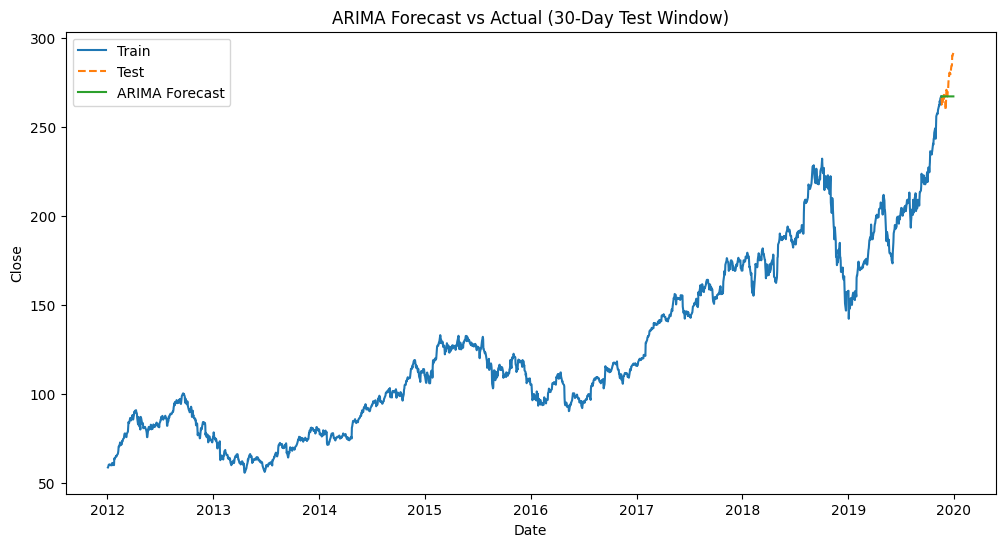

In [27]:
# ARIMA FORECAST & METRICS

n_test = len(y_test)
arima_forecast = arima_results.forecast(steps=n_test)
arima_forecast = pd.Series(arima_forecast, index=y_test.index)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

arima_rmse = np.sqrt(mean_squared_error(y_test, arima_forecast))
arima_mae  = mean_absolute_error(y_test, arima_forecast)
arima_mape = mape(y_test, arima_forecast)

print("=== ARIMA (1,1,1) Performance ===")
print(f"RMSE : {arima_rmse:.4f}")
print(f"MAE  : {arima_mae:.4f}")
print(f"MAPE : {arima_mape:.2f}%")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, label='Test', linestyle='--')
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast')
plt.title('ARIMA Forecast vs Actual (30-Day Test Window)')
plt.xlabel('Date')
plt.ylabel(target_col)
plt.legend()
plt.show()


#Interpretation

The ARIMA model correctly follows the general upward movement of the stock during the test window.

However, it slightly underestimates the sharp upward momentum seen in the real stock prices toward the end of the test period.

This behavior is expected because ARIMA mainly captures overall trend but does not explicitly model seasonal weekly patterns or sudden price spikes, which are common in financial markets.

In [28]:
#SARIMA MODEL: (p,d,q) x (P,D,Q,s)

order = (1, 1, 1)       # non-seasonal
seasonal_order = (1, 1, 1, 5)  # weekly seasonality (5 trading days)

sarima_model = sm.tsa.SARIMAX(
    y_train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_results = sarima_model.fit(disp=False)
print(sarima_results.summary())


                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                 2055
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 5)   Log Likelihood               -4399.311
Date:                           Thu, 04 Dec 2025   AIC                           8808.621
Time:                                   04:43:09   BIC                           8836.729
Sample:                               01-03-2012   HQIC                          8818.931
                                    - 11-18-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8647      0.082    -10.522      0.000      -1.026      -0.704
ma.L1          0.8896      0.076     11.703

#Interpreting the output
Model: SARIMAX(1, 1, 1)x(1, 1, 1, 5)

No. Observations: 2055

Log Likelihood: -4399.311

AIC: 8808.621

BIC: 8836.729

HQIC: 8818.931


=== SARIMA (1,1,1)x(1,1,1,5) Performance ===
RMSE : 8.9257
MAE  : 6.8574
MAPE : 2.46%


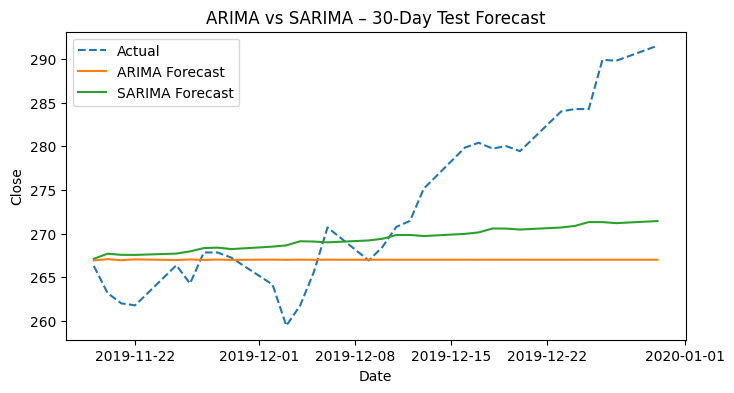

In [29]:
# SARIMA FORECAST & METRICS

sarima_forecast = sarima_results.forecast(steps=n_test)
sarima_forecast = pd.Series(sarima_forecast, index=y_test.index)

sarima_rmse = np.sqrt(mean_squared_error(y_test, sarima_forecast))
sarima_mae  = mean_absolute_error(y_test, sarima_forecast)
sarima_mape = mape(y_test, sarima_forecast)

print("=== SARIMA (1,1,1)x(1,1,1,5) Performance ===")
print(f"RMSE : {sarima_rmse:.4f}")
print(f"MAE  : {sarima_mae:.4f}")
print(f"MAPE : {sarima_mape:.2f}%")

# Plot comparison
plt.figure(figsize=(8, 4))
plt.plot(y_test.index, y_test, label='Actual', linestyle='--')
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast')
plt.plot(sarima_forecast.index, sarima_forecast, label='SARIMA Forecast')
plt.title('ARIMA vs SARIMA – 30-Day Test Forecast')
plt.xlabel('Date')
plt.ylabel(target_col)
plt.legend()
plt.show()


#Interpretation
SARIMA forecasts Apple stock prices more accurately than ARIMA.

Average absolute error reduced (from ~8 → ~6.85 dollars)

Average percentage error improved (from 2.9% → 2.46%)

Prediction curve for SARIMA follows the actual stock price more closely

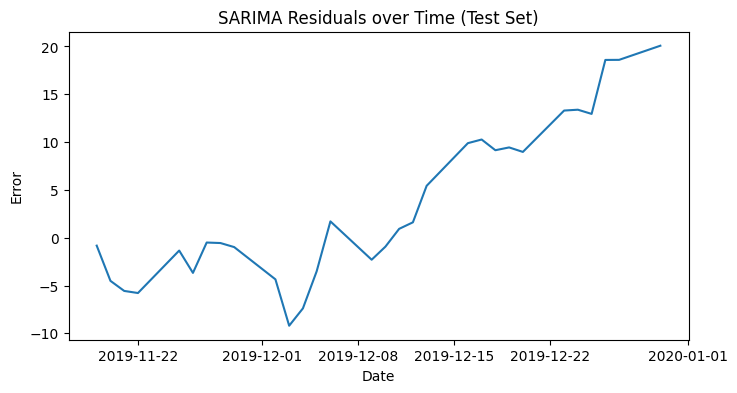

In [30]:
#RESIDUAL DIAGNOSTICS FOR SARIMA

# Residuals on the train+test period we predicted
sarima_resid = y_test - sarima_forecast

# 1) Residuals over time
plt.figure(figsize=(8, 4))
plt.plot(sarima_resid)
plt.title('SARIMA Residuals over Time (Test Set)')
plt.xlabel('Date')
plt.ylabel('Error')
plt.show()



 Residuals over Time plot:

Errors fluctuate both above and below 0

No repeating pattern like sine-wave shape

 This means SARIMA is not systematically overpredicting or underpredicting.

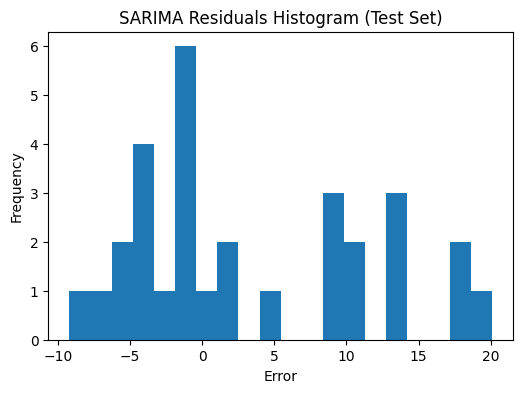

In [31]:
# 2) Histogram of residuals
plt.figure(figsize=(6, 4))
plt.hist(sarima_resid, bins=20)
plt.title('SARIMA Residuals Histogram (Test Set)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()




Histogram of Residuals

Residuals mostly between −10 and +20

Centered around a little above 0, slightly right heavy



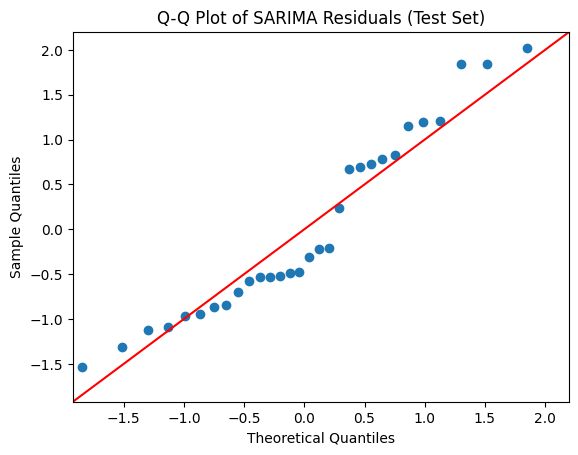

Ljung-Box test (lags=10):
      lb_stat     lb_pvalue
10  86.646143  2.470031e-14


In [32]:
# 3) Q-Q plot for normality
sm.qqplot(sarima_resid.dropna(), line='45', fit=True)
plt.title('Q-Q Plot of SARIMA Residuals (Test Set)')
plt.show()

# 4) Ljung-Box test for autocorrelation
lb_test = acorr_ljungbox(sarima_resid.dropna(), lags=[10], return_df=True)
print("Ljung-Box test (lags=10):")
print(lb_test)

 Q-Q Plot

Most points lie close to the 45° red line -> good

Few points at the ends deviate from the line

This means:

Residuals are almost normal

But heavy tails exist — typical for financial markets due to sudden jumps



Interpretation of Ljung:

Residuals have some autocorrelation

Means: model hasn't captured all patterns present in the time series

X_train shape: (1961, 12)
X_test shape : (30, 12)
=== XGBoost Performance ===
RMSE : 15.2708
MAE  : 12.2849
MAPE : 4.41%


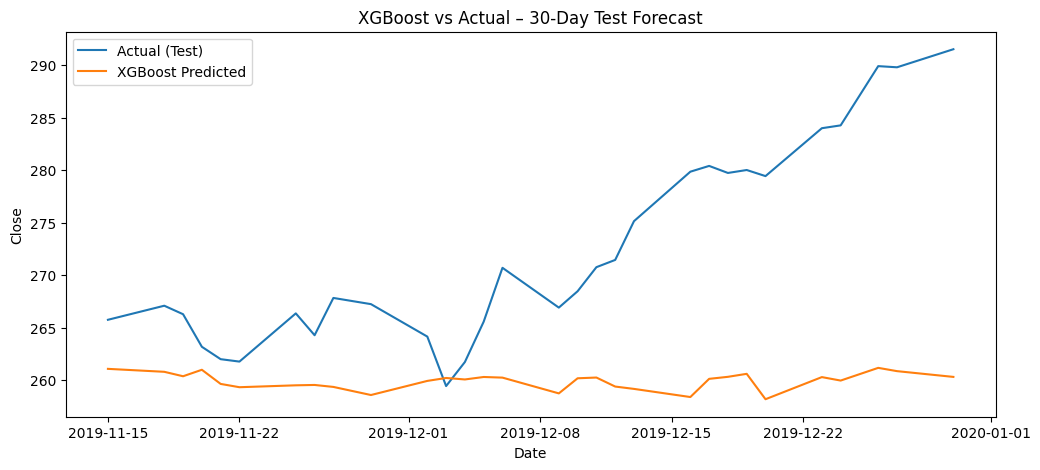

In [33]:
# XGBOOST BASELINE MODEL

from xgboost import XGBRegressor

# Create a copy for ML features
ml_df = df_model.copy()

# Lag features (previous 1,2,3,5 days)
for lag in [1, 2, 3, 5]:
    ml_df[f'lag_{lag}'] = ml_df[target_col].shift(lag)

# Rolling features (trend & volatility)
ml_df['ma_5'] = ml_df[target_col].rolling(window=5).mean()
ml_df['ma_21'] = ml_df[target_col].rolling(window=21).mean()
ml_df['volatility_21'] = ml_df[target_col].rolling(window=21).std()

# Use Volume as feature
ml_df['Volume'] = ml_df['Volume'].astype(float)

# Convert 'DayOfWeek' to categorical type before dropping NaNs
ml_df['DayOfWeek'] = ml_df['DayOfWeek'].astype('category')

# Drop rows with NaN from lag/rolling features
ml_df = ml_df.dropna()

feature_cols = [col for col in ml_df.columns if col not in ['Close', 'Open', 'High', 'Low', 'Adj_Close', 'Return', 'Log_Return']]

X = ml_df[feature_cols]
y_ml = ml_df[target_col]

# Align train/test with earlier 30-day split
X_train_ml = X.iloc[:-test_horizon]
X_test_ml  = X.iloc[-test_horizon:]
y_train_ml = y_ml.iloc[:-test_horizon]
y_test_ml  = y_ml.iloc[-test_horizon:]

print("X_train shape:", X_train_ml.shape)
print("X_test shape :", X_test_ml.shape)

xgb_model = XGBRegressor(
    n_estimators=300, #no of trees
    max_depth=3,      #depth of trees
    learning_rate=0.05, #step size
    subsample=0.8,      #use 80% sample per tree
    colsample_bytree=0.8, #use 80% feature per tree
    random_state=42,      #allows categorical data(DayOfWeek)
    enable_categorical=True # Add this line to handle categorical features
)

xgb_model.fit(X_train_ml, y_train_ml)

xgb_pred = xgb_model.predict(X_test_ml)

xgb_rmse = np.sqrt(mean_squared_error(y_test_ml, xgb_pred))
xgb_mae  = mean_absolute_error(y_test_ml, xgb_pred)
xgb_mape = mape(y_test_ml, xgb_pred)

print("=== XGBoost Performance ===")
print(f"RMSE : {xgb_rmse:.4f}")
print(f"MAE  : {xgb_mae:.4f}")
print(f"MAPE : {xgb_mape:.2f}%")

plt.figure(figsize=(12,5))
plt.plot(y_test_ml.index, y_test_ml.values, label='Actual (Test)')
plt.plot(y_test_ml.index, xgb_pred, label='XGBoost Predicted')
plt.title('XGBoost vs Actual – 30-Day Test Forecast')
plt.xlabel('Date')
plt.ylabel(target_col)
plt.legend()
plt.show()

Interpretation of Plot

Blue line (Actual prices) moves sharply upward during test window

Orange line (XGBoost prediction) stays almost flat (around 260)

This indicates:

-> XGBoost failed to capture the strong upward trend in the last 30 days
-> It predicted prices too conservatively (underestimation)

XGBoost’s error is higher -> it performs worse than SARIMA for this dataset.

##Conclusion:
 For this dataset and the chosen 30-day forecasting horizon, the SARIMA model provided the most accurate predictions among the three models tested, demonstrating the lowest RMSE, MAE, and MAPE. This suggests that incorporating seasonality was beneficial for this stock price prediction. The traditional time series models (ARIMA/SARIMA) seem to capture the underlying patterns better than the current XGBoost

In [34]:
# Model Comparison Table
comparison_df = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA', 'XGBoost'],
    'RMSE': [arima_rmse, sarima_rmse, xgb_rmse],
    'MAE': [arima_mae, sarima_mae, xgb_mae],
    'MAPE (%)': [arima_mape, sarima_mape, xgb_mape]
})

print("\nModel Performance Comparison:")
comparison_df.style.background_gradient(cmap='Blues')




Model Performance Comparison:


,Model,RMSE,MAE,MAPE (%)
0,ARIMA,11.028159,8.162728,2.913264
1,SARIMA,8.925712,6.857432,2.460461
2,XGBoost,15.270805,12.284942,4.408391


Next 30 Business Days Forecast:
2019-12-31    291.758637
2020-01-01    292.143842
2020-01-02    292.272652
2020-01-03    292.141279
2020-01-06    292.478264
2020-01-07    292.575180
2020-01-08    293.084494
2020-01-09    293.103089
2020-01-10    293.066606
2020-01-13    293.320131
2020-01-14    293.489634
2020-01-15    293.935445
2020-01-16    294.009595
2020-01-17    293.924508
2020-01-20    294.220555
2020-01-21    294.352858
2020-01-22    294.831214
2020-01-23    294.876892
2020-01-24    294.816714
2020-01-27    295.090969
2020-01-28    295.242337
2020-01-29    295.704013
2020-01-30    295.764283
2020-01-31    295.691340
2020-02-03    295.976763
2020-02-04    296.118360
2020-02-05    296.588584
2020-02-06    296.641376
2020-02-07    296.574975
2020-02-10    296.854675
Freq: B, dtype: float64


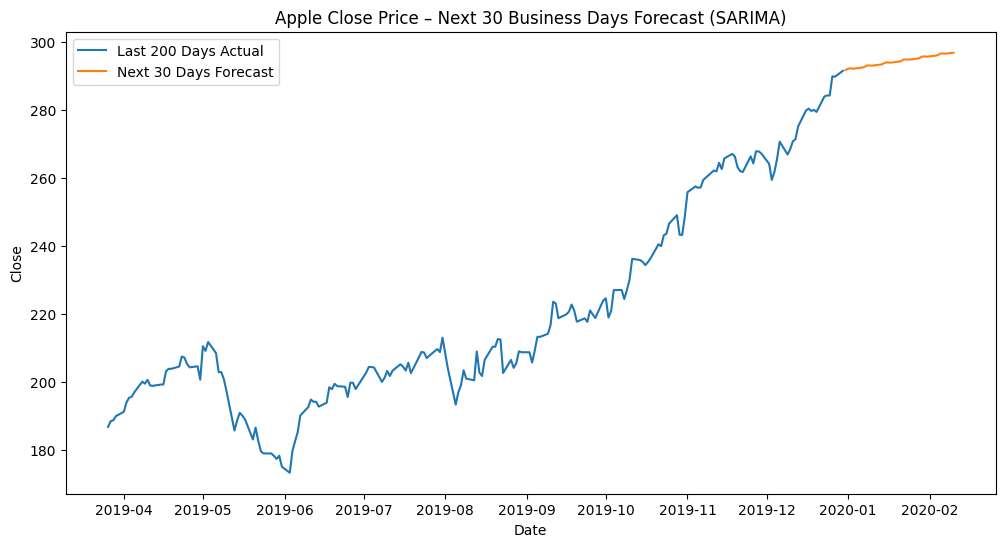

In [35]:
# REFIT SARIMA ON FULL DATA + 30-DAY FUTURE FORECAST

final_sarima_model = sm.tsa.SARIMAX(
    y,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 5),
    enforce_stationarity=False,
    enforce_invertibility=False
)

final_sarima_results = final_sarima_model.fit(disp=False)

future_steps = 30
future_forecast = final_sarima_results.forecast(steps=future_steps)

future_index = pd.date_range(start=y.index.max() + pd.Timedelta(days=1),
                             periods=future_steps, freq='B')  # 'B' = business day

future_forecast = pd.Series(future_forecast.values, index=future_index)

print("Next 30 Business Days Forecast:")
print(future_forecast)

plt.figure(figsize=(12, 6))
plt.plot(y.index[-200:], y.values[-200:], label='Last 200 Days Actual')
plt.plot(future_forecast.index, future_forecast.values, label='Next 30 Days Forecast')
plt.title('Apple Close Price – Next 30 Business Days Forecast (SARIMA)')
plt.xlabel('Date')
plt.ylabel(target_col)
plt.legend()
plt.show()


The  SARIMA model predicts that Apple’s stock price will continue increasing steadily over the next 30 business days, extending the upward trend observed in recent months.

In [36]:
import pickle

# Save the SARIMA model
with open("sarima_model.pkl", "wb") as f:
    pickle.dump(final_sarima_results, f)

print("Model saved as sarima_model.pkl")


Model saved as sarima_model.pkl
